# <center>User File

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


###### Set Target Start and End Dates

Set a date you want to see predictions from 

In [12]:
import datetime
target_start = datetime.date(2022, 1, 1)
%store target_start

Stored 'target_start' (date)


Run a criteria file for other time periods and ranges

In [15]:
model_number = 0
model_start = str(target_start)
model_name = str('28_03_m' + str(model_number) + '_' + model_start)
%store model_name

Stored 'model_name' (str)


In [16]:
model_name

'28_03_m0_2022-01-01'

In [17]:
%run Criteria.ipynb

Stored 'target_range' (int)
Stored 'training_range' (int)
Stored 'training_range_2' (int)
Stored 'training_range_3' (int)
Stored 'training_end' (date)
Stored 'training_period' (DatetimeIndex)
Stored 'training_len' (int)
Stored 'training_start' (datetime)
Stored 'training_period_2' (DatetimeIndex)
Stored 'training_len_2' (int)
Stored 'training_start_2' (datetime)
Stored 'training_period_3' (DatetimeIndex)
Stored 'training_len_3' (int)
Stored 'training_start_3' (datetime)


To see our criteria:

In [13]:
Dates_and_Ranges = pd.read_csv("Dates_and_Ranges_" + model_name +".csv") 
Dates_and_Ranges

,Periods,Start,End,Range,Target start,Target end,Model name
0,training_period,"Mar 24, 2020","Aug 31, 2021",360,"Sep 01, 2021","Aug 26, 2022",m_Sep_27_03
1,training_period_2,"Sep 16, 2020","Aug 31, 2021",240,"Sep 01, 2021","Aug 26, 2022",m_Sep_27_03
2,training_period_3,"Mar 10, 2021","Aug 31, 2021",120,"Sep 01, 2021","Aug 26, 2022",m_Sep_27_03


With our dates and ranges, the next step is to find a file with sales data that fits withing these ranges

In [14]:
%run Data_sets.ipynb
Sales_in_range = pd.read_csv("Sales_in_range.csv") 

Then we want to check this is correct for minimum and maximum values and have a look at trading across the to check for errors

In [15]:
trading_df = find_trading_df(Sales_in_range, training_start, training_range, holidays)
trading_df['Created'].min(), trading_df['Created'].max()

(Timestamp('2020-03-24 00:00:00'), Timestamp('2021-08-31 00:00:00'))

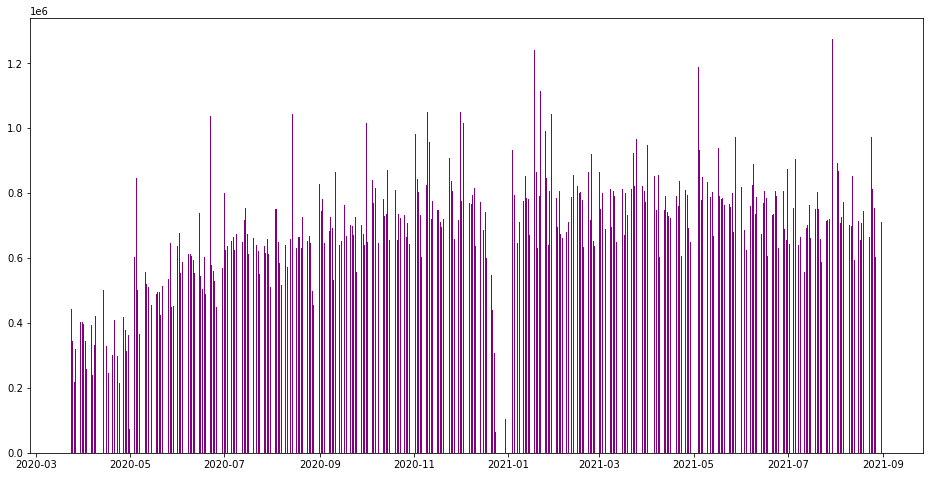

In [16]:
fig_LM1 = plt.figure(figsize = (16, 8))
plt.bar(trading_df['Created'], trading_df['Total spend'],color ='#800080',
        width = 0.6)
plt.show()

## Customer Classes

We would like to define different classes of Customers so that we are modelling 'like' behaviour. Where Customers have not purchased for a period of time longer than usual we can think of them as having churned to some extent. In our machine learning model we are measuring the extent customers behaviour is likely to remain constant. This means the custoemrs who have already churned will behave consistently but in a different way to those buying regularly. Our classes put customers in different groups so that the models can tell this type of predictability apart.

For Customer classes we run a Study periods file

In [17]:
%run Study_periods.ipynb

where we also have a description of our classes

In [18]:
Classes_df = pd.read_csv("Classes_viz.csv").fillna('')
Classes_df = Classes_df.fillna('')
Classes_df

,Classes,Sales_lines,Total_customers
0,A,4339120,8983
1,B,433337,6046
2,C,428490,1887
3,D,66047,10240
4,,5266994,27156


###### Variable Creation

With the dataset filed into classes of customers we can go ahead and create variables for each of those customers

###### Class A

In [23]:
training_data = pd.read_csv("C:/Users/knightm-adm/Create_models/Class_A.csv") 
training_data.to_csv("training_data.csv", index=False) 

In [ ]:
%run LM_x.ipynb

In [20]:
ML_variables = pd.read_csv("LM_variables_" + model_name + ".csv") 
pd.options.display.max_columns = 100
ML_variables.head(3)

,Branch,Customer,Recency,Lifetime_pc,Exp_buy_range,C_latency,Training_start_var,First_buy,Tr_range,Tr_range_name,Last_buy,Buys_pd,Buy_days_pd,Buy_concentration,Spend_per_buy,Spend_pd,LM_Int_pd,LM_Coef_pd,LM_MAE_pd,LM_Int_spend,LM_Coef_spend,LM_MAE_spend,LM_P,Actual,A_pd,Training_start_var_2,Tr_range_2,Tr_range_name_2,Buys_pd_2,Buy_days_pd_2,Buy_concentration_2,Spend_per_buy_2,Spend_pd_2,LM_Int_pd_2,LM_Coef_pd_2,LM_MAE_pd_2,LM_Int_spend_2,LM_Coef_spend_2,LM_MAE_spend_2,LM_P_2,Training_start_var_3,Tr_range_3,Tr_range_name_3,Buys_pd_3,Buy_days_pd_3,Buy_concentration_3,Spend_per_buy_3,Spend_pd_3,LM_Int_pd_3,LM_Coef_pd_3,LM_MAE_pd_3,LM_Int_spend_3,LM_Coef_spend_3,LM_MAE_spend_3,LM_P_3,Changing_P,Mean_P,Median_P,Season_adj,Model_name
0,101,92461,8,0.9806,2.9752,2.6889,2020-03-27,2020-03-27,358,0,2021-08-24,1.7039,0.3380,5.0413,24.4461,41.6539,0.1331,-0.0039,1.0317,0.0032,-0.0001,0.0248,29.8158,764.9200,3.0597,2020-12-11,179,1,1.5866,0.2626,6.0426,21.9735,34.8630,0.2304,-0.0082,1.6495,0.0066,-0.0002,0.0473,14.4336,2021-03-12,119,2,1.4034,0.2269,6.1852,21.0268,29.5082,0.2214,0.0055,2.3522,0.0075,0.0002,0.0797,17.1605,12.6553,20.4699,0.0075,1.4864,m_Sep_27_03
1,101,74222,1,0.9528,1.7734,0.5639,2020-04-21,2020-04-21,344,0,2021-08-31,4.0523,0.5930,6.8333,17.4687,70.7890,0.2391,-0.0082,1.1480,0.0034,-0.0001,0.0162,45.9832,11250.0600,45.0002,2020-12-22,172,1,3.4651,0.5291,6.5495,18.5837,64.3947,0.4995,-0.0315,1.7371,0.0078,-0.0005,0.0270,7.8522,2021-03-19,114,2,2.5000,0.4649,5.3774,20.2610,50.6525,0.4831,-0.0136,1.9661,0.0095,-0.0003,0.0388,15.6800,30.3032,23.1718,0.0095,1.4864,m_Sep_27_03
2,101,1320,13,0.9806,2.2222,5.8500,2020-03-24,2020-03-24,361,0,2021-08-19,2.2576,0.4515,5.0000,28.7520,64.9111,0.3048,-0.0287,2.9549,0.0047,-0.0004,0.0455,0.9255,31238.9000,124.9556,2020-12-10,180,1,1.5889,0.3556,4.4688,27.3498,43.4557,0.5496,-0.0685,2.2462,0.0126,-0.0016,0.0517,0.0000,2021-03-11,120,2,1.0167,0.2667,3.8125,16.9446,17.2270,0.2726,-0.0287,0.9718,0.0158,-0.0017,0.0564,0.0000,0.9255,0.3085,0.0158,1.4864,m_Sep_27_03


## Machine learning

In [ ]:
Class_A_for_ML.shape